# Flight Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
%matplotlib inline
sb.set_theme(style = 'whitegrid')

In [2]:
# plot functions
# User defined histogram plot function
def hist_plot(data, x_arg, title, x_label, y_label, bin_size, kde):
    """
    A univariate plot function that creates the histogram visualization of a feature in a dataframe using seaborn.
    
    Args:
        data: The dataframe from where the feature is to be plotted.
        x_arg: x-axis parameter enclosed in parentheses. Use None if not to be used for the plot type.
        title: Title of the plot, enclosed in quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
        y_label: y_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
        bin_size: user defined bin_size. Use None for default bin_size.
        kde: Includes the kernel density. Value is either True or False.
    """
    sb.histplot(data = data, x = x_arg, bins = bin_size, kde = kde)
    plt.axvline(data[x_arg].mean(), color = 'red', linestyle = '-', linewidth = 2, label = 'Mean')
    plt.axvline(data[x_arg].median(), color = 'cyan', linestyle = ':', linewidth = 2, label = 'Median')
    plt.title(title, size = 15, weight = 'bold')
    plt.xlabel(x_label, size = 15, weight = 'bold')
    plt.ylabel(y_label, size = 15, weight = 'bold')
    plt.legend()
    
# User defined box plot function    
def box_plot(data, x_arg, y_arg, title, x_label):
    """
    A univariate plot function that creates the boxplot of selected feature using seaborn.
    
    Args:
        data: The dataframe from where the feature is to be plotted.
        x_arg: x-axis parameter enclosed in parentheses.
        y_arg: y-axis parameter enclosed in parentheses. Use 'None' if only x-axis.
        title: Title of the plot, enclosed in quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks.
    """
    ax = sb.boxplot(data = data, x = x_arg, y = y_arg, color = 'white')#sb.color_palette()[0])
    plt.title(title, size = 15, weight = 'bold')
    plt.xlabel(x_label, size = 15, weight = 'bold')
    plt.setp(ax.lines, color = 'black')
    
# User defined count plot function
def count_plot(dataframe, feature, title, x_label, y_label, order):
    """
    A function that plots the count of a feature in a given dataframe using seaborn countplot.
    
    Args:
        dataframe: Dataframe from which data will be plotted.
        feature: Column to be plotted
        title: Histogram title inputed as string with quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks.
        y_label: y_axis label inputed as string with quoatation marks.
        order: Order in which the data will be plotted. If the data is to be plotted in no order, input 'None'.
    """
    ax = sb.countplot(data = dataframe, y = feature, color = sb.color_palette()[7], order = order)
    patch_height = [patch.get_height() for patch in ax.patches]
    max_val = np.argmax(patch_height)
    ax.patches[max_val].set_facecolor(sb.color_palette()[2])
    plt.title(title, fontsize = 15)
    plt.xlabel(x_label, fontsize = 15)
    plt.ylabel(y_label, fontsize = 15)
    plt.xticks(size = 10)
    plt.yticks(size = 10)

In [3]:
data = pd.read_csv('flights.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

## Identify any null or missing data, and impute appropriate replacement values.
- All column names to lowercase and renaming them for clarity and readability
- Checking for null/missing values

In [4]:
data.columns = [x.lower() for x in data.columns]
data.rename(columns = {'dayofmonth':'day_of_month', 'dayofweek':'day_of_week', 'originairportid':'origin_airport_id',
                       'originairportname':'origin_airport_name', 'origincity':'origin_city', 'originstate':'origin_state',
                       'destairportid':'dest_airport_id', 'destairportname':'dest_airport_name', 'destcity':'dest_city',
                       'crsdeptime':'crs_dept_time', 'depdelay':'dep_delay', 'depdel15':'dep_delay_15', 'crsarrtime':'crs_arr_time',
                       'arrdelay':'arr_delay', 'arrdel15':'arr_delay_15'}, inplace = True)
# missing values
missing_percentage = (data.isnull().sum() / data.shape[0]) * 100
missing_percentage

year                   0.000000
month                  0.000000
day_of_month           0.000000
day_of_week            0.000000
carrier                0.000000
origin_airport_id      0.000000
origin_airport_name    0.000000
origin_city            0.000000
origin_state           0.000000
dest_airport_id        0.000000
dest_airport_name      0.000000
dest_city              0.000000
deststate              0.000000
crs_dept_time          0.000000
dep_delay              0.000000
dep_delay_15           1.015297
crs_arr_time           0.000000
arr_delay              0.000000
arr_delay_15           0.000000
cancelled              0.000000
dtype: float64

Only the `dep_delay_15` has missing values totaling with 1.015297 percent of the data missing.

In [5]:
print(f'Missing values in dep_delay_15: {data.dep_delay_15.isnull().sum()} \n')
data.dep_delay_15 = data.dep_delay_15.replace(np.nan, 'missing')
print(f'percentage of values:\n{(data.dep_delay_15.value_counts() / data.shape[0]) * 100}')

# replace missing values with most occurring values
data.dep_delay_15 = data.dep_delay_15.replace('missing', 0)
print(f'\npercentage of values: \n{(data.dep_delay_15.value_counts() / data.shape[0]) * 100}')

Missing values in dep_delay_15: 2761 

percentage of values:
0.0        79.075531
1.0        19.909171
missing     1.015297
Name: dep_delay_15, dtype: float64

percentage of values: 
0.0    80.090829
1.0    19.909171
Name: dep_delay_15, dtype: float64


A total of `2761` values were missing and afer much obervation, they were replaced `0` as there were less late departures in the column as compared to early departures.

## Identify and eliminate any outliers in the dep_delay and arr_delay columns.

In [6]:
data[['dep_delay', 'arr_delay']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
dep_delay,271940.0,10.350449,35.673710,-63.0,-4.0,-1.0,9.0,1425.0
arr_delay,271940.0,6.496650,38.230331,-75.0,-11.0,-3.0,10.0,1440.0


The summary statistics of the `arr_delay` and `dep_delay` shows existence of large outlier values as observed in the maximum values and standard deviation og both columns. 70 percent of data lie between 9 minutes and 10 minutes for the `dep_delay` and `arr_delay` respectively, which is a huge disparity as compared to their respective maximum values.

To get a clearer view of the outlier values and the effect, the columns will be visualized using histogram and boxplots.

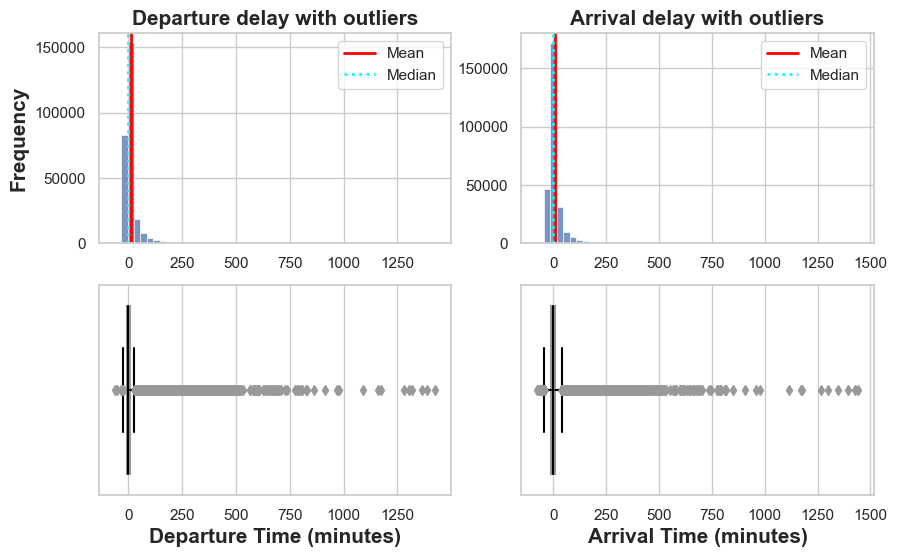

In [7]:
# distribution
plt.figure(figsize = [10, 6])
plt.subplot(2, 2, 1)
hist_plot(data, 'dep_delay', 'Departure delay with outliers', '', 'Frequency', 50, False)
plt.subplot(2, 2, 2)
hist_plot(data, 'arr_delay', 'Arrival delay with outliers', '', '', 50, False)
plt.subplot(2, 2, 3)
box_plot(data, 'dep_delay', None, '', 'Departure Time (minutes)')
plt.subplot(2, 2, 4)
box_plot(data, 'arr_delay', None, '', 'Arrival Time (minutes)')

In [8]:
# display the bottom 10 values for arr_delay and dep_delay sorted in ascending order
display(data[['arr_delay', 'dep_delay']].sort_values('arr_delay').tail(10))

,arr_delay,dep_delay
14320,977,977
214288,1114,1091
95648,1172,1158
6537,1175,1172
241527,1267,1281
32883,1301,1320
255631,1348,1366
251813,1394,1386
180503,1429,1425
121919,1440,1305


Outlier values will be eliminated taking value between `1%` and `90%` of the whole dataset.

(217784, 20)

,count,mean,std,min,25%,50%,75%,max
dep_delay,217784.0,-0.836246,5.947004,-12.0,-5.0,-2.0,1.0,17.0
arr_delay,217784.0,-4.971031,11.619321,-33.0,-13.0,-6.0,2.0,38.0


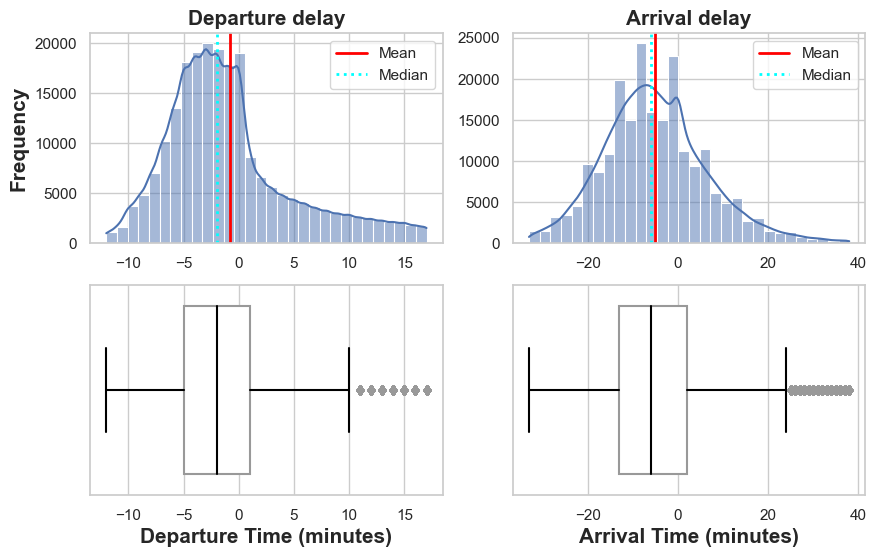

In [9]:
# removing outliers
arr_lower_bound = data['arr_delay'].quantile(0.01) # 1%
arr_upper_bound = data['arr_delay'].quantile(0.90) # 90%
mark_bound_arr = data['arr_delay'].between(arr_lower_bound, arr_upper_bound)
data = data[mark_bound_arr]

# dep_delay 
dep_lower_bound = data['dep_delay'].quantile(0.01) # 1%
dep_upper_bound = data['dep_delay'].quantile(0.90) # 90%
mark_bound_dep = data['dep_delay'].between(dep_lower_bound, dep_upper_bound)
data = data[mark_bound_dep]

display(data.shape)
display(data[['dep_delay', 'arr_delay']].describe().transpose())

plt.figure(figsize = [10, 6])
plt.subplot(2, 2, 1)
hist_plot(data, 'dep_delay', 'Departure delay', '', 'Frequency', 30, True)
plt.subplot(2, 2, 2)
hist_plot(data, 'arr_delay', 'Arrival delay', '', '', 30, True)
plt.subplot(2, 2, 3)
box_plot(data, 'dep_delay', None, '', 'Departure Time (minutes)')
plt.subplot(2, 2, 4)
box_plot(data, 'arr_delay', None, '', 'Arrival Time (minutes)')

Removing the outliers, the total dataset reduced to `217,784` rows which will be used for further analysis. The histogram and boxplot above shows the `dep_delay` and `arr_delay` without outlier values.

## Exploratory Analysis
Descriptive statistics of numerical values. Columns as `year`, `month`, `dep_delay_15`, `arr_delay_15` and more columns in the data set, though represented with numerical values but are all categorical data types.

In [10]:
data[['crs_dept_time', 'dep_delay', 'crs_arr_time', 'arr_delay']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
crs_dept_time,217784.0,1280.271030,469.644867,1.0,850.0,1235.0,1655.0,2359.0
dep_delay,217784.0,-0.836246,5.947004,-12.0,-5.0,-2.0,1.0,17.0
crs_arr_time,217784.0,1463.311993,486.115964,1.0,1055.0,1445.0,1848.0,2359.0
arr_delay,217784.0,-4.971031,11.619321,-33.0,-13.0,-6.0,2.0,38.0


### 1. What are the average (mean) departure and arrival delays?

In [11]:
display(data[['dep_delay', 'arr_delay']].mean())

dep_delay   -0.836246
arr_delay   -4.971031
dtype: float64

The mean `departure` and `arrival` delay's are `-0.836246` and `-4.971031` minutes respectively. This goes to show that on average, all flights leave ahead of schedule and arrive ahead of schedule, mostly arriving ahead of schedule.

### 2. How do the carriers compare in terms of arrival delay performance?

Mean arrival delays for the different carriers:


carrier,9E,AA,AS,B6,DL,EV,F9,FL,HA,MQ,OO,UA,US,VX,WN,YV
arr_delay,-7.510031,-5.860361,-3.735079,-5.779341,-6.534812,-6.795104,-0.485106,-3.851489,-2.351228,-4.2685,-4.260857,-7.631624,-3.885489,-5.225232,-2.686965,-3.826199


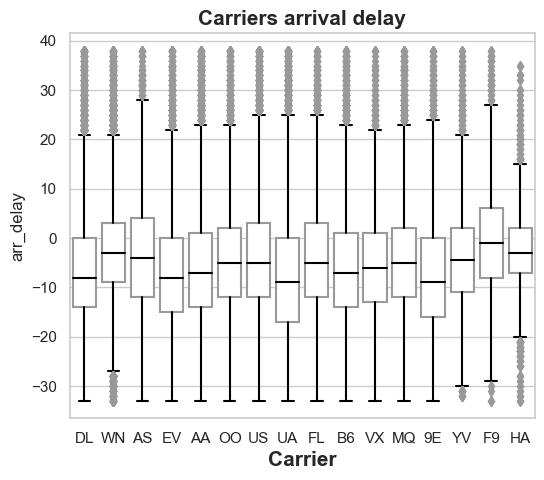

In [12]:
# carriers arrival delay performance
print(f'Mean arrival delays for the different carriers:')
display(data.groupby('carrier')[['arr_delay']].mean().transpose())

plt.figure(figsize = [6, 5])
box_plot(data, 'carrier', 'arr_delay', 'Carriers arrival delay', 'Carrier')

From the above boxplot and descriptive statstics table, all carriers have a mean negative arrival_delay time. This implies they all arrive some minutes before the scheduled time.

### 3. Is there a noticable difference in arrival delays for different days of the week?

Mean arrival delays for the days of the week:


day_of_week,1,2,3,4,5,6,7
arr_delay,-4.87114,-5.524483,-4.683904,-3.833167,-4.410105,-6.228786,-5.437547


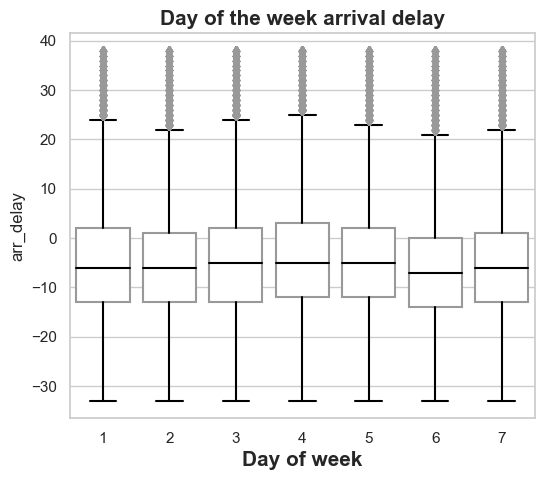

In [13]:
# arrival delay for days of the week
print(f'Mean arrival delays for the days of the week:')
display(data.groupby('day_of_week')[['arr_delay']].mean().transpose())

plt.figure(figsize = [6, 5])
box_plot(data, 'day_of_week', 'arr_delay', 'Day of the week arrival delay', 'Day of week')

`Week day 6` has the earliest arrival with `-6.228786`, though all arrivals in the weekdays are before scheduled time.

### 4. Which departure airport has the highest average departure delay?

Mean departure delays for departure airports:


,dep_delay
origin_airport_name,
Chicago Midway International,2.603017
Dallas Love Field,2.320488
William P Hobby,1.805943
Metropolitan Oakland International,1.077142
Denver International,0.946852


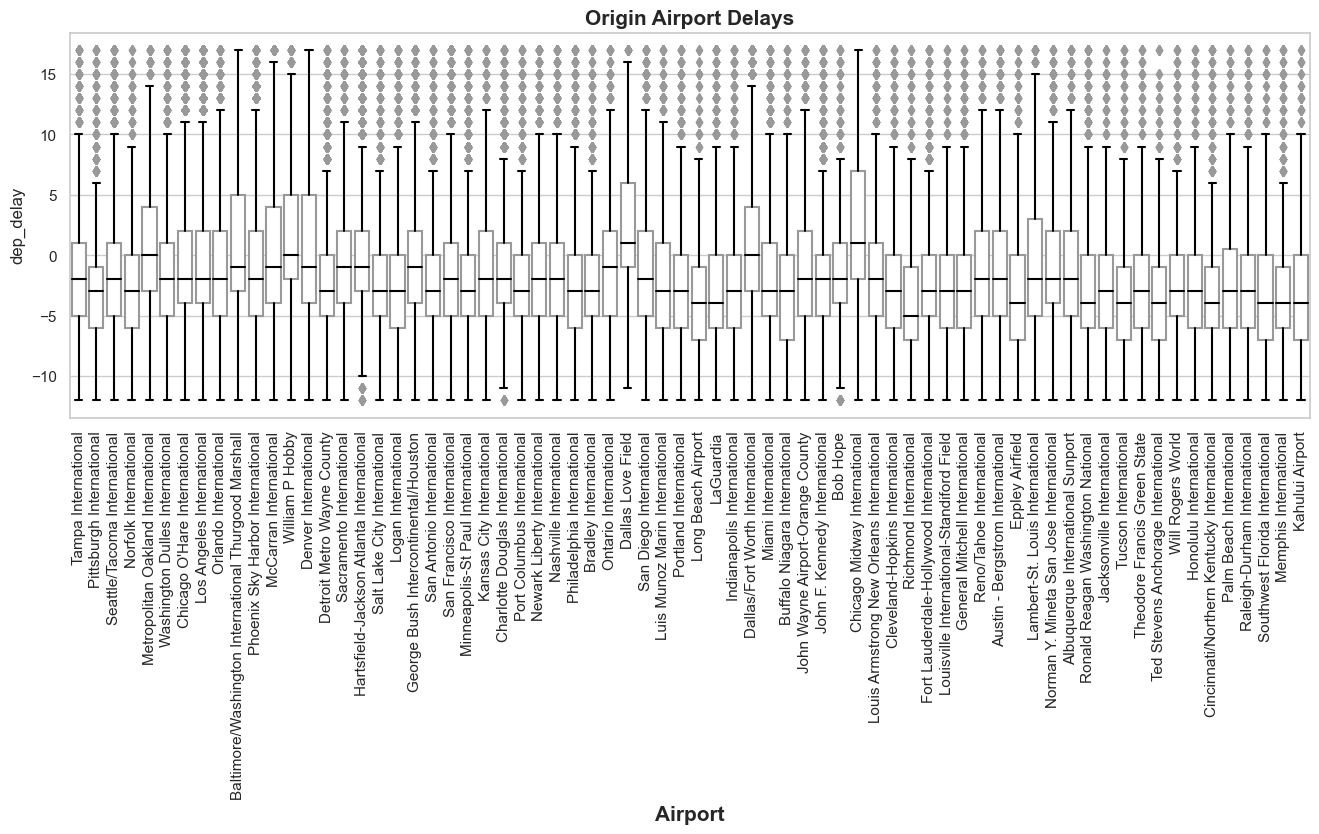

In [14]:
print(f'Mean departure delays for departure airports:')
display(data.groupby('origin_airport_name')[['dep_delay']].mean().sort_values('dep_delay', ascending = False).head())

plt.figure(figsize = [16, 5])
box_plot(data, 'origin_airport_name', 'dep_delay', 'Origin Airport Delays', 'Airport')
plt.xticks(rotation = 90);

`Chicago Midway International` airport has the highest average departure delay with `2.603017` minutes.

### 5. Do late departures tend to result in longer arrival delays than on-time departures?

,arr_delay
dep_delay_15,
0.0,-5.370834
1.0,10.050832


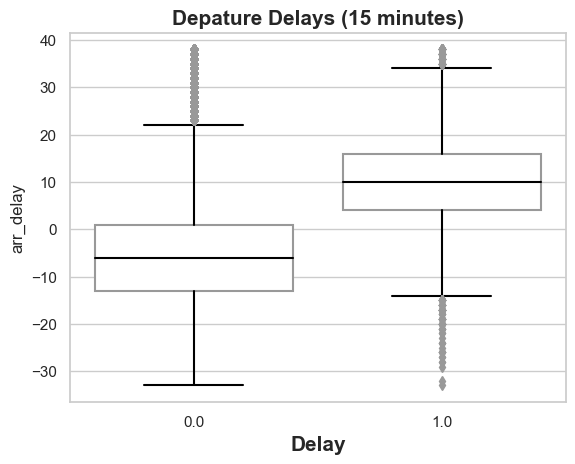

In [15]:
display(data.groupby('dep_delay_15')[['arr_delay']].mean())
box_plot(data, 'dep_delay_15', 'arr_delay', 'Depature Delays (15 minutes)', 'Delay')

From the table and boxplot above, it is clearly evident that late departures results in late arrivals, on average. Flights without departure delays arrive at least `5 minutes earlier` than the scheduled arrival time, while flights with delayed departures arrive at least `10 minutes late` on average, to their destination. 

### 6. Which route (from origin airport to destination airport) has the most late* arrivals?*

In [16]:
travel_route = data['origin_airport_name'] + ' --> ' + data['dest_airport_name']
data['travel_route'] = travel_route
data.groupby('travel_route')[['arr_delay_15']].sum().sort_values('arr_delay_15', ascending = False).head()

,arr_delay_15
travel_route,
San Francisco International --> Los Angeles International,93
Los Angeles International --> San Francisco International,73
LaGuardia --> Hartsfield-Jackson Atlanta International,71
Los Angeles International --> John F. Kennedy International,55
LaGuardia --> Charlotte Douglas International,52


The `San Francisco International --> Los Angeles International` route has the highest number of delayed arrivals totalling `93` arrivals after scheduled arrival time.

### 7. Which route has the highest average arrival delay?

In [17]:
data.groupby('travel_route')[['arr_delay']].mean().sort_values('arr_delay', ascending = False).head()

,arr_delay
travel_route,
Louis Armstrong New Orleans International --> Ronald Reagan Washington National,24.500000
John F. Kennedy International --> Louisville International-Standiford Field,18.000000
Cleveland-Hopkins International --> Palm Beach International,18.000000
Cleveland-Hopkins International --> Philadelphia International,10.833333
Memphis International --> Denver International,9.758621


The `Louis Armstrong New Orleans International --> Ronald Reagan Washington National` route has the most arrival delay in terms of time with `24.50` minutes on average.